# Loading the Libraries

In [ ]:
url = "https://storage.googleapis.com/kaggle-competitions-data/kaggle-v2/10683/220065/compressed/train.csv.zip?GoogleAccessId=web-data@kaggle-161607.iam.gserviceaccount.com&Expires=1583199225&Signature=JKnrd0PTNySLxtm9Dni9N3GuxGCzxVFZ1IOLRZfB%2FgGiZf448YLwO%2BRXnHEfDoqxjIhu9Cl%2BP9%2FcMaO4R9oUdw2jgr4DcHY8KFrwDuo3FAwSG4G1JlmLCi06VGpoxC578VSAMQrTK%2BiTHzSchs7lVRe%2FLCaM%2FgQQA2Xdvt6gAZ76kXrF0Kh%2B3avP%2BWu1zRj11tCgdJv8PJ87YoOUbH%2BsL2s%2BPEQEg1juyX9Ixlq%2FbctlK3ZX%2FG76MD77RRmPQhNFASIUOub4ZEAVuhDG3DGNpay%2BDIrNIrTXgO3EF%2FPynkCHPkXIGKLSa7rA0xzBDOqT1qy0mujk%2F1m2Wt685%2Fd%2Few%3D%3D&response-content-disposition=attachment%3B+filename%3Dtrain.csv.zip"
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time


# Loading 2000000 rows of the data. The actual data is larger.

In [ ]:

start = time.time()
data = pd.read_csv(url, nrows = 2000000)
end = time.time()
print("Time taken to load the data is: ",end - start)

print("Shape of data is: ", data.shape)

# Splitting the data into traindata and testdata, equally having 1000000 rows each

In [ ]:
traindata = data[0:1000000]
testdata = data[1000000:]
print(traindata.shape)
print(testdata.shape)

(1000000, 83)
(1000000, 83)


In [ ]:
traindata.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1735.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,2668.0,9124.0,4.0,5.0,...,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,0,IS_GENUINE,Retail,NaN,0.0,Retail,NaN,628.0,36144.0,0,NaN,0.0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,1.1.14600.4,4.13.17134.1,1.263.48.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2668.0,91656.0,4.0,5.0,...,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NaN,1.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,0,OFFLINE,Retail,NaN,0.0,NOT_SET,NaN,628.0,57858.0,0,NaN,0.0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1341.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,RequireAdmin,1.0,1.0,Desktop,Windows.Desktop,4909.0,317701.0,4.0,5.0,...,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.165,amd64,rs4_release,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,52682.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,1.1.15100.1,4.18.1807.18075,1.273.1527.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,NaN,117.0,115,windows10,x64,10.0.0.0,17134,256,rs4,17134.1.amd64fre.rs4_release.180410-1804,Pro,1.0,0,NaN,0.0,137.0,ExistsNotSet,1.0,1.0,Desktop,Windows.Desktop,1443.0,275890.0,4.0,5.0,...,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NaN,4.294967e+09,10.0.17134.228,amd64,rs4_release,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,355.0,20050.0,0,NaN,0.0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417e

In [ ]:
testdata.head()

,MachineIdentifier,ProductName,EngineVersion,AppVersion,AvSigVersion,IsBeta,RtpStateBitfield,IsSxsPassiveMode,DefaultBrowsersIdentifier,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsVer,OsBuild,OsSuite,OsPlatformSubRelease,OsBuildLab,SkuEdition,IsProtected,AutoSampleOptIn,PuaMode,SMode,IeVerIdentifier,SmartScreen,Firewall,UacLuaenable,Census_MDC2FormFactor,Census_DeviceFamily,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,...,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSVersion,Census_OSArchitecture,Census_OSBranch,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_IsPortableOperatingSystem,Census_GenuineStateName,Census_ActivationChannel,Census_IsFlightingInternal,Census_IsFlightsDisabled,Census_FlightRing,Census_ThresholdOptIn,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsWIMBootEnabled,Census_IsVirtualDevice,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
1000000,1cb967ed7f684821466802667a3398bd,win8defender,1.1.15200.1,4.18.1807.18075,1.275.938.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,171,124736.0,NaN,211.0,182,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Desktop,Windows.Desktop,4589.0,313586.0,4.0,5.0,...,SSD,113858.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NaN,4.294967e+09,10.0.17134.254,amd64,rs4_release,17134,254,Core,CORE,IBSClean,29.0,125,FullAuto,0,IS_GENUINE,OEM:NONSLP,NaN,0.0,Retail,NaN,142.0,11216.0,0,NaN,0.0,0,0,0.0,0.0,3.0,0
1000001,1cb968e7627269748e617759da0002bf,win8defender,1.1.15100.1,4.18.1806.18062,1.273.488.0,0,7.0,0,NaN,48510.0,2.0,1.0,1,29,95010.0,NaN,35.0,171,windows10,x64,10.0.0.0,14393,768,rs1,14393.2189.amd64fre.rs1_release.180329-1711,Home,1.0,0,NaN,0.0,98.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,4395.0,273338.0,2.0,5.0,...,HDD,466913.0,0,4096.0,Notebook,14.0,1366.0,768.0,Mobile,lion,0.000000e+00,10.0.14393.2189,amd64,rs1_release,14393,2189,CoreSingleLanguage,CORE_SINGLELANGUAGE,Update,26.0,119,FullAuto,0,IS_GENUINE,Retail,0.0,0.0,Retail,0.0,142.0,4357.0,1,0.0,0.0,0,0,0.0,1.0,10.0,1
1000002,1cb969ba01ffa4f7e3f1efbb614a84f2,win8defender,1.1.15200.1,4.13.17134.1,1.275.1769.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,201,66202.0,27.0,267.0,251,windows10,x64,10.0.0.0,17134,768,rs4,17134.1.amd64fre.rs4_release.180410-1804,Home,1.0,0,NaN,0.0,137.0,NaN,1.0,1.0,Notebook,Windows.Desktop,2230.0,253149.0,2.0,5.0,...,SSD,29252.0,0,3072.0,Laptop,13.3,1920.0,1080.0,Mobile,NaN,0.000000e+00,10.0.17134.1,amd64,rs4_release,17134,1,CoreSingleLanguage,CORE_SINGLELANGUAGE,IBSClean,35.0,148,UNKNOWN,0,IS_GENUINE,OEM:DM,NaN,0.0,NOT_SET,NaN,142.0,43534.0,0,NaN,0.0,0,0,0.0,0.0,11.0,1
1000003,1cb96d2ff2bbb72ac9e46851098cd406,win8defender,1.1.15200.1,4.18.1807.18075,1.275.1380.0,0,7.0,0,NaN,53447.0,1.0,1.0,1,88,20710.0,27.0,117.0,115,windows10,x64,10.0.0.0,16299,768,rs3,16299.431.amd64fre.rs3_release_svc_escrow.1805...,Home,1.0,0,NaN,0.0,117.0,RequireAdmin,1.0,1.0,Notebook,Windows.Desktop,585.0,189830.0,4.0,5.0,...,SSD,108182.0,1,4096.0,Notebook,13.4,1920.0,1080.0,Mobile,lion,0.000000e+00,10.0.16299.547,amd64,rs3_release_svc_escrow,16299,547,Core,CORE,Update,8.0,31,AutoInstallAndRebootAtMaintenanceTime,0,IS_GENUINE,Retail,0.0

# The basic info about our traindata

In [ ]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 83 columns):
MachineIdentifier                                    1000000 non-null object
ProductName                                          1000000 non-null object
EngineVersion                                        1000000 non-null object
AppVersion                                           1000000 non-null object
AvSigVersion                                         1000000 non-null object
IsBeta                                               1000000 non-null int64
RtpStateBitfield                                     996334 non-null float64
IsSxsPassiveMode                                     1000000 non-null int64
DefaultBrowsersIdentifier                            48303 non-null float64
AVProductStatesIdentifier                            995907 non-null float64
AVProductsInstalled                                  995907 non-null float64
AVProductsEnabled                           

# Distribution of Data

Looking at the distribution of data with respect to the class label

Positive detections:  499813
Negative detections:  500187


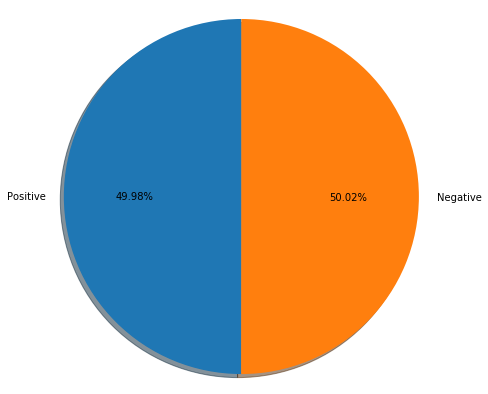

In [ ]:
positives = (traindata["HasDetections"]==1).sum()
negatives = (traindata["HasDetections"]==0).sum()
print("Positive detections: ", positives)
print("Negative detections: ", negatives)

labelsForPie1 = ['Positive','Negative']
sizesForPie1 = [positives,negatives]
fig1, ax1 = plt.subplots(figsize=(7,7))
ax1.pie(sizesForPie1, labels=labelsForPie1, autopct='%1.2f%%',shadow=True, startangle=90)
#To add percentages to each of the constitutents of the pie chart, we add in the line, autopct
#1.2f for getting percentages upto hundredths place
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Looking at the distribution of missing values in the dataset

In [ ]:
missingCounts=[]
missingPercent =[]
totalvalues=traindata.shape[0]

for col in traindata:
  temp = traindata[col].isnull().sum()
  missingCounts.append(temp)
  missingPercent.append(temp/totalvalues*100)

missingInfo = pd.DataFrame({"Attribute Name":traindata.columns,"Missing Count": missingCounts, "Missing Percent": missingPercent})
#looking at the attributes with missing values
missingInfo[missingInfo["Missing Count"]!=0].reset_index(drop=True).sort_values("Missing Count", ascending=False)


,Attribute Name,Missing Count,Missing Percent
10,PuaMode,999738,99.9738
21,Census_ProcessorClass,995875,99.5875
1,DefaultBrowsersIdentifier,951697,95.1697
34,Census_IsFlightingInternal,830157,83.0157
31,Census_InternalBatteryType,709830,70.9830
36,Census_ThresholdOptIn,634570,63.4570
39,Census_IsWIMBootEnabled,633713,63.3713
13,SmartScreen,355777,35.5777
6,OrganizationIdentifier,308936,30.8936
11,SMode,59902,5.9902


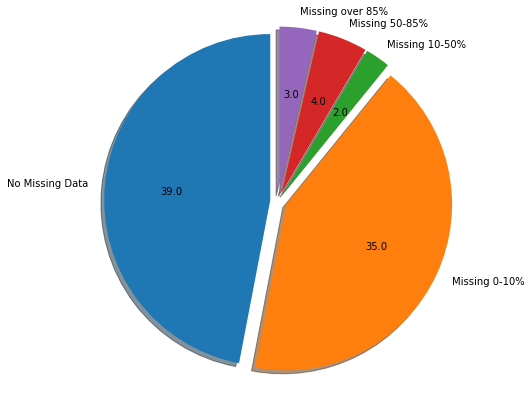

In [ ]:
no_missing_col_count = (missingInfo["Missing Percent"]==0).sum()
zero_to_10_count = ((missingInfo["Missing Percent"]!=0) & (missingInfo["Missing Percent"]<=10)).sum()
ten_to_50_count = ((missingInfo["Missing Percent"]>10) & (missingInfo["Missing Percent"]<=50)).sum()
fifty_to_85_count = ((missingInfo["Missing Percent"]>50) & (missingInfo["Missing Percent"]<=85)).sum()
more_than_85 = (missingInfo["Missing Percent"]>85).sum()


labelsForPie2 = ['No Missing Data','Missing 0-10%','Missing 10-50%','Missing 50-85%', 'Missing over 85%']
sizesForPie2 = [no_missing_col_count,zero_to_10_count,ten_to_50_count,fifty_to_85_count,more_than_85]
explode = (0.05, 0.05, 0.05, 0.05, 0.05)
fig2, ax2 = plt.subplots(figsize=(7,7))


def absolute_value(val):
    a  = np.round(val/100*83)
    return a
ax2.pie(sizesForPie2, labels=labelsForPie2, autopct=absolute_value,shadow=True, startangle=90,explode=explode)
#To add values to each of the constitutents of the pie chart
ax2.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

Finding the droppable attributes

In [ ]:
print("The Attributes with more than 85% missing values are:\n\n")
miss85 = missingInfo[missingInfo['Missing Percent']>85]

miss85


The Attributes with more than 85% missing values are:




,Attribute Name,Missing Count,Missing Percent
8,DefaultBrowsersIdentifier,951697,95.1697
28,PuaMode,999738,99.9738
41,Census_ProcessorClass,995875,99.5875


Finding the list of good columns, which have less than 15% of their values missing

In [ ]:
# good_columns = list(traindata.columns)
# for col in missingInfo:
#   if col['Missing Percent']>85:
#     good_columns.remove(col['Attribute Name'])
good_columns = missingInfo[missingInfo['Missing Percent']<85]
good_columns = good_columns['Attribute Name'].reset_index(drop=True)
good_columns = list(good_columns)
print(len(good_columns))
print(good_columns)

80
['MachineIdentifier', 'ProductName', 'EngineVersion', 'AppVersion', 'AvSigVersion', 'IsBeta', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'OsBuildLab', 'SkuEdition', 'IsProtected', 'AutoSampleOptIn', 'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable', 'Census_MDC2FormFactor', 'Census_DeviceFamily', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_ChassisTypeName', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'C

In [ ]:
#In the above blocks I have made a list of good_columns, which contains the columns having more than 85%values missing rmeoved.
#Now to get traindata restricted to the good_columns, this code will work
traindata = traindata[good_columns]
# traindata

Finding the Skewness of data

In [ ]:
skewness = []
# stats = []
for col in traindata.columns:
    skewness.append((col,traindata[col].nunique(),traindata[col].value_counts(normalize=True).values[0] * 100, traindata[col].dtype))
    # stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
skewness = pd.DataFrame(skewness, columns=['Attribute Name', '# of Unique values', '% in the biggest category', 'type'])
skewness.sort_values('% in the biggest category', ascending=False).reset_index()[0:30]

,index,Attribute Name,# of Unique values,% in the biggest category,type
0,72,Census_IsWIMBootEnabled,1,100.000000,float64
1,65,Census_IsFlightingInternal,2,99.999411,float64
2,5,IsBeta,2,99.999300,int64
3,66,Census_IsFlightsDisabled,2,99.998982,float64
4,26,AutoSampleOptIn,2,99.996900,int64
...,...,...,...,...,...
75,4,AvSigVersion,7353,1.157600,object
76,13,CityIdentifier,50872,1.110757,float64
77,70,Census_FirmwareVersionIdentifier,29161,1.021778,float64
78,41,Census_SystemVolumeTotalCapacity,212928,0.583129,float64


Removing the columns having more than 99% values in 1 category

In [ ]:
skew99 = skewness[skewness['% in the biggest category']>99]
skewcols = list(skew99['Attribute Name'])
print(skewcols)
# print(len(good_columns))
for col in good_columns:
  # print(col)
  if col in skewcols:
    good_columns.remove(col)

# print("\n\n")

print(len(good_columns))
# for col in good_columns:
#   print(col)


['IsBeta', 'AutoSampleOptIn', 'SMode', 'UacLuaenable', 'Census_DeviceFamily', 'Census_IsPortableOperatingSystem', 'Census_IsFlightingInternal', 'Census_IsFlightsDisabled', 'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled', 'Census_IsVirtualDevice']
72


In [ ]:
skew99 = skewness[skewness['% in the biggest category']>99]
skewcols = list(skew99['Attribute Name'])
print(skewcols)
# print(len(good_columns))
for col in good_columns:
  # print(col)
  if col in skewcols:
    good_columns.remove(col)

# print("\n\n")

print(len(good_columns))
# for col in good_columns:
#   print(col)


['IsBeta', 'AutoSampleOptIn', 'SMode', 'UacLuaenable', 'Census_DeviceFamily', 'Census_IsPortableOperatingSystem', 'Census_IsFlightingInternal', 'Census_IsFlightsDisabled', 'Census_ThresholdOptIn', 'Census_IsWIMBootEnabled', 'Census_IsVirtualDevice']
69


In [ ]:
traindata=traindata[good_columns]
# traindata

# Filling the Missing data

In [ ]:
missingCounts=[]
missingPercent =[]
totalvalues=traindata.shape[0]

for col in traindata:
  temp = traindata[col].isnull().sum()
  missingCounts.append(temp)
  missingPercent.append(temp/totalvalues*100)

missingInfo = pd.DataFrame({"Attribute Name":traindata.columns,"Missing Count": missingCounts, "Missing Percent": missingPercent})
#looking at the attributes with missing values
missingInfo[missingInfo["Missing Count"]!=0].reset_index(drop=True).sort_values("Missing Count", ascending=False).reset_index()


,index,Attribute Name,Missing Count,Missing Percent
0,26,Census_InternalBatteryType,709830,70.9830
1,10,SmartScreen,355777,35.5777
2,5,OrganizationIdentifier,308936,30.8936
3,4,CityIdentifier,36513,3.6513
4,33,Wdft_RegionIdentifier,34093,3.4093
5,32,Wdft_IsGamer,34093,3.4093
6,27,Census_InternalBatteryNumberOfCharges,30076,3.0076
7,29,Census_FirmwareManufacturerIdentifier,20453,2.0453
8,30,Census_FirmwareVersionIdentifier,17888,1.7888
9,13,Census_OEMModelIdentifier,11313,1.1313


In [ ]:
 nbi=0
for col in missingInfo[missingInfo["Missing Count"]!=0]['Attribute Name']:
  print(i)
  i+=1
  print("Attribute name is: ",col)
  print("Number of unique values: ", traindata[col].nunique())
  # traindata['Wdft_IsGamer']=traindata['Wdft_IsGamer'].astype(bool)
  print("Data type: ", traindata[col].dtype)
  print("Number of null values: ", traindata[col].isnull().sum())
  # if traindata[col].nunique()<=100:
  print(traindata[col].value_counts(dropna=False))
  print(traindata[col][0:10])
  # sns.distplot(traindata[col])
  print("\n\n\n\n\n")
  
  

# print("Number of unique values: ", traindata['Wdft_IsGamer'].nunique())
# traindata['Wdft_IsGamer']=traindata['Wdft_IsGamer'].astype(bool)
# print("Data type: ", traindata['Wdft_IsGamer'].dtype)
# print("Number of null values: ", traindata['Wdft_IsGamer'].isnull().sum())
# print(traindata['Wdft_IsGamer'][0:20])
# print(traindata['Wdft_IsGamer'].value_counts(dropna=False))
# traindata['Wdft_IsGamer'].fillna(0, inplace=True)
# traindata['Wdft_IsGamer']=traindata['Wdft_IsGamer'].astype(int)
# print(traindata['Wdft_IsGamer'].isnull().sum())
# print(traindata['Wdft_IsGamer'].value_counts())
# sns.distplot(traindata['Wdft_IsGamer'])

Defining the way in which we will fill the missing values

In [ ]:
#These columns will get Nan replaced by mean
mean_cols = ["Census_OEMModelIdentifier",
"Census_OEMNameIdentifier",
"Census_ProcessorCoreCount",
"Census_PrimaryDiskTotalCapacity",
"Census_SystemVolumeTotalCapacity",
"Census_OSInstallLanguageIdentifier",
"Census_InternalPrimaryDiagonalDisplaySizeInInches",
"Census_InternalPrimaryDisplayResolutionHorizontal",
"Census_InternalPrimaryDisplayResolutionVertical",
"Census_InternalBatteryNumberOfCharges",
"Census_FirmwareVersionIdentifier",
"Census_ProcessorModelIdentifier",
"Wdft_RegionIdentifier"]
#These columns will get Nan replaced by 0
zero_cols = ["CityIdentifier",
"OrganizationIdentifier"]
#These columns will get Nan replaced by mode
mode_cols = ["OsBuildLab",
"IsProtected",
"Firewall",
"Census_ProcessorManufacturerIdentifier",
"Census_IsAlwaysOnAlwaysConnectedCapable",
"Wdft_IsGamer",
"RtpStateBitfield",
"AVProductStatesIdentifier",
"AVProductsInstalled",
"AVProductsEnabled",
"GeoNameIdentifier",
"IeVerIdentifier",
"Census_TotalPhysicalRAM",
"Census_FirmwareManufacturerIdentifier"]
#These columns will get Nan replaced by "NotAvail"
not_avail_cols = ["SmartScreen",
"Census_InternalBatteryType"]
#These columns will get Nan replaced by "Unknown"
unknown_cols=["Census_PrimaryDiskTypeName",
"Census_ChassisTypeName",
"Census_PowerPlatformRoleName"]


In [ ]:
i=0
print("MEAN")
for col in mean_cols:
  print(i)
  i+=1
  print("Attribute name is: ",col)
  mean = traindata[col].mean()
  traindata[col].fillna(mean, inplace=True)
  # print("Number of unique values: ", traindata[col].nunique())
  # traindata['Wdft_IsGamer']=traindata['Wdft_IsGamer'].astype(bool)
  # print("Data type: ", traindata[col].dtype)
  print("Number of null values: ", traindata[col].isnull().sum())
  # if traindata[col].nunique()<=100:
  print(traindata[col].value_counts(dropna=False))
  # print(traindata[col][0:10])
  # sns.distplot(traindata[col])
  print("\n\n")
  
print("\n\n\n\n\n")  
print("ZERO")
i=0
for col in zero_cols:
  print(i)
  i+=1
  print("Attribute name is: ",col)
  # mean = traindata[col].mean()
  traindata[col].fillna(0, inplace=True)
  # print("Number of unique values: ", traindata[col].nunique())
  # traindata['Wdft_IsGamer']=traindata['Wdft_IsGamer'].astype(bool)
  # print("Data type: ", traindata[col].dtype)
  print("Number of null values: ", traindata[col].isnull().sum())
  # if traindata[col].nunique()<=100:
  print(traindata[col].value_counts(dropna=False))
  # print(traindata[col][0:10])
  # sns.distplot(traindata[col])
  print("\n\n")

print("\n\n\n\n\n")  
print("MODE")
i=0
for col in mode_cols:
  print(i)
  i+=1
  print("Attribute name is: ",col)
  # mode = traindata[col].mode()
  mode = traindata[col].value_counts().idxmax()
  traindata[col].fillna(mode, inplace=True)
  # print("Number of unique values: ", traindata[col].nunique())
  # traindata['Wdft_IsGamer']=traindata['Wdft_IsGamer'].astype(bool)
  # print("Data type: ", traindata[col].dtype)
  print("Number of null values: ", traindata[col].isnull().sum())
  # if traindata[col].nunique()<=100:
  print(traindata[col].value_counts(dropna=False))
  # print(traindata[col][0:10])
  # sns.distplot(traindata[col])
  print("\n\n")

print("\n\n\n\n\n")  
print("NotAvail")
i=0
for col in not_avail_cols:
  print(i)
  i+=1
  print("Attribute name is: ",col)
  # mode = traindata[col].mode()
  traindata[col].fillna("NotAvail", inplace=True)
  # print("Number of unique values: ", traindata[col].nunique())
  # traindata['Wdft_IsGamer']=traindata['Wdft_IsGamer'].astype(bool)
  # print("Data type: ", traindata[col].dtype)
  print("Number of null values: ", traindata[col].isnull().sum())
  # if traindata[col].nunique()<=100:
  print(traindata[col].value_counts(dropna=False))
  # print(traindata[col][0:10])
  # sns.distplot(traindata[col])
  print("\n\n")

MEAN
0
Attribute name is:  Census_OEMModelIdentifier
Number of null values:  0
313586.000000    34045
242491.000000    29771
317701.000000    15487
317708.000000    12849
238977.204578    11313
                 ...  
295827.000000        1
295823.000000        1
295822.000000        1
295800.000000        1
131072.000000        1
Name: Census_OEMModelIdentifier, Length: 59914, dtype: int64



1
Attribute name is:  Census_OEMNameIdentifier
Number of null values:  0
2668.0    144664
2102.0    116589
1443.0    106115
2206.0    103719
585.0     100768
           ...  
3238.0         1
3235.0         1
3233.0         1
3232.0         1
2.0            1
Name: Census_OEMNameIdentifier, Length: 2004, dtype: int64



2
Attribute name is:  Census_ProcessorCoreCount
Number of null values:  0
4.0000      608337
2.0000      259574
8.0000       96857
12.0000      10496
6.0000        7900
1.0000        7763
3.9897        4632
16.0000       2060
3.0000        1503
32.0000        229
20.0000        215

In [ ]:
print("UNKNOWN")

i=0
for col in unknown_cols:
  print(i)
  i+=1
  print("Attribute name is: ",col)
  traindata[col].replace({"Unspecified": "UNKNOWN", "Unknown": "UNKNOWN", "NotAvail": "UNKNOWN"}, inplace=True)
  # mode = traindata[col].mode()
  traindata[col].fillna("UNKNOWN", inplace=True)
  # print("Number of unique values: ", traindata[col].nunique())
  # traindata['Wdft_IsGamer']=traindata['Wdft_IsGamer'].astype(bool)
  # print("Data type: ", traindata[col].dtype)
  print("Number of null values: ", traindata[col].isnull().sum())
  # if traindata[col].nunique()<=100:
  print(traindata[col].value_counts(dropna=False))
  # print(traindata[col][0:10])
  # sns.distplot(traindata[col])
  print("\n\n")

UNKNOWN
0
Attribute name is:  Census_PrimaryDiskTypeName
Number of null values:  0
HDD        650454
SSD        277021
UNKNOWN     72525
Name: Census_PrimaryDiskTypeName, dtype: int64



1
Attribute name is:  Census_ChassisTypeName
Number of null values:  0
Notebook               588678
Desktop                209552
Laptop                  76501
Portable                40659
AllinOne                23105
MiniTower                9502
Convertible              9419
UNKNOWN                  8781
Other                    8450
Detachable               5744
LowProfileDesktop        5646
HandHeld                 5120
SpaceSaving              3279
Tablet                   1492
Tower                    1410
MainServerChassis        1060
MiniPC                    529
LunchBox                  422
RackMountChassis          384
BusExpansionChassis        84
SubNotebook                80
30                         29
0                          16
StickPC                    12
Blade                 

In [ ]:
missingCounts=[]
missingPercent =[]
totalvalues=traindata.shape[0]

for col in traindata:
  temp = traindata[col].isnull().sum()
  missingCounts.append(temp)
  missingPercent.append(temp/totalvalues*100)

missingInfo = pd.DataFrame({"Attribute Name":traindata.columns,"Missing Count": missingCounts, "Missing Percent": missingPercent})
#looking at the attributes with missing values
missingInfo[missingInfo["Missing Count"]!=0].reset_index(drop=True).sort_values("Missing Count", ascending=False).reset_index()


,index,Attribute Name,Missing Count,Missing Percent


Missing columns filled

# Feature Engineering

In [ ]:
engineVersion = traindata['AppVersion']
engineVersion = engineVersion.str.split('.', expand = True)
traindata.insert(2, "EngineVersion1", engineVersion[0])
traindata.insert(3, "EngineVersion2", engineVersion[1])
traindata.insert(4, "EngineVersion3", engineVersion[2])
traindata.insert(5, "EngineVersion4", engineVersion[3])
traindata.drop('EngineVersion', axis=1, inplace=True)


# In[5]:


appVersion = traindata['AppVersion']
appVersion = appVersion.str.split('.', expand = True)
traindata.insert(2, "AppVersion1", appVersion[0])
traindata.insert(3, "AppVersion2", appVersion[1])
traindata.insert(4, "AppVersion3", appVersion[2])
traindata.insert(5, "AppVersion4", appVersion[3])
traindata.drop('AppVersion', axis=1, inplace=True)


# In[6]:


sigVersion = traindata['AvSigVersion']
sigVersion = sigVersion.str.split('.', expand = True)
traindata.insert(2, "SigVersion1", sigVersion[0])
traindata.insert(3, "SigVersion2", sigVersion[1])
traindata.insert(4, "SigVersion3", sigVersion[2])
traindata.insert(5, "SigVersion4", sigVersion[3])
traindata.drop('AvSigVersion', axis=1, inplace=True)


# In[7]:


osver = traindata['OsVer']
osver = osver.str.split('.', expand = True)
traindata.insert(2, "OsVer1", osver[0])
traindata.insert(3, "OsVer2", osver[1])
traindata.insert(4, "OsVer3", osver[2])
traindata.insert(5, "OsVer4", osver[3])
traindata.drop('OsVer', axis=1, inplace=True)


# In[9]:


osbuildlab = traindata['OsBuildLab']
osbuildlab = osbuildlab.str.split('.', expand = True)
traindata.insert(2, "OsBuildLab1", osbuildlab[0])
traindata.insert(3, "OsBuildLab2", osbuildlab[1])
traindata.insert(4, "OsBuildLab3", osbuildlab[2])
traindata.insert(5, "OsBuildLab4", osbuildlab[3])
traindata.insert(6, "OsBuildLab5", osbuildlab[4])
traindata.drop('OsBuildLab', axis=1, inplace=True)


# In[11]:


osbuildlabn = traindata['OsBuildLab5']
osbuildlabn = osbuildlabn.str.split('-', expand = True)
traindata.insert(6, "OsBuildLab5_1", osbuildlabn[0])
traindata.insert(7, "OsBuildLab5_2", osbuildlabn[1])
traindata.drop('OsBuildLab5', axis=1, inplace=True)


# In[13]:


censusos = traindata['Census_OSVersion']
censusos = censusos.str.split('.', expand = True)
traindata.insert(2, "Census_OSVersion1", censusos[0])
traindata.insert(3, "Census_OSVersion2", censusos[1])
traindata.insert(4, "Census_OSVersion3", censusos[2])
traindata.insert(5, "Census_OSVersion4", censusos[3])
traindata.drop('Census_OSVersion', axis=1, inplace=True)


# In[14]:


censusosbranch = traindata['Census_OSBranch']
censusosbranch = censusosbranch.str.split('_', expand = True)
traindata.insert(2, "Census_OSBranch1", censusosbranch[0])
traindata.drop('Census_OSBranch', axis=1, inplace=True)



In [ ]:
traindata.head()

,MachineIdentifier,ProductName,Census_OSBranch1,Census_OSBranch2,Census_OSVersion1,Census_OSVersion2,Census_OSVersion3,Census_OSVersion4,OsBuildLab1,OsBuildLab2,OsBuildLab3,OsBuildLab4,OsBuildLab5_1,OsBuildLab5_2,OsVer1,OsVer2,OsVer3,OsVer4,SigVersion1,SigVersion2,SigVersion3,SigVersion4,AppVersion1,AppVersion2,AppVersion3,AppVersion4,EngineVersion1,EngineVersion2,EngineVersion3,EngineVersion4,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,...,Firewall,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSArchitecture,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,rs4,release,10,0,17134,165,17134,1,amd64fre,rs4_release,180410,1804,10,0,0,0,1,273,1735,0,4,18,1807,18075,4,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,...,1.0,Desktop,2668.0,9124.0,4.0,5.0,2341.0,476940.0,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NotAvail,4.294967e+09,amd64,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,Retail,628.0,36144.0,0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,rs4,release,10,0,17134,1,17134,1,amd64fre,rs4_release,180410,1804,10,0,0,0,1,263,48,0,4,13,17134,1,4,13,17134,1,7.0,0,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,...,1.0,Notebook,2668.0,91656.0,4.0,5.0,2405.0,476940.0,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NotAvail,1.000000e+00,amd64,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,NOT_SET,628.0,57858.0,0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,rs4,release,10,0,17134,165,17134,1,amd64fre,rs4_release,180410,1804,10,0,0,0,1,273,1341,0,4,18,1807,18075,4,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,...,1.0,Desktop,4909.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NotAvail,4.294967e+09,amd64,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,Retail,142.0,52682.0,0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,rs4,release,10,0,17134,228,17134,1,amd64fre,rs4_release,180410,1804,10,0,0,0,1,273,1527,0,4,18,1807,18075,4,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,88,20710.0,0.0,117.0,...,1.0,Desktop,1443.0,275890.0,4.0,5.0,2273.0,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NotAvail,4.294967e+09,amd64,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,IS_GENUINE,OEM:NONSLP,Retail,355.0,20050.0,0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,rs4,release,10,0,17134,191,17134,1,amd64fre,rs4_release,180410,1804,10,0,0,0,1,273,1379,0,4,18,1807,18075,4,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,18,37376.0,0.0,277.0,...,1.0,Notebook,1443.0,331929.0,4.0,5.0,2500.0,476940.0,HDD,101900.0,0,6144.0,Portable,14.0,1366.0,768.0,Mobile,lion,0.000000e+00,amd64,17134,191,Core,CORE,Update,8.0,31,FullAuto,IS_GENUINE,Retail,Retail,355

In [ ]:
missingCounts=[]
missingPercent =[]
totalvalues=traindata.shape[0]

for col in traindata:
  temp = traindata[col].isnull().sum()
  missingCounts.append(temp)
  missingPercent.append(temp/totalvalues*100)

missingInfo = pd.DataFrame({"Attribute Name":traindata.columns,"Missing Count": missingCounts, "Missing Percent": missingPercent})
#looking at the attributes with missing values
missingInfo[missingInfo["Missing Count"]!=0].reset_index(drop=True).sort_values("Missing Count", ascending=False).reset_index()


,index,Attribute Name,Missing Count,Missing Percent


In [ ]:
skewness = []
# stats = []
for col in traindata.columns:
    skewness.append((col,traindata[col].nunique(),traindata[col].value_counts(normalize=True).values[0] * 100, traindata[col].dtype))
    # stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
skewness = pd.DataFrame(skewness, columns=['Attribute Name', '# of Unique values', '% in the biggest category', 'type'])
skewness.sort_values('% in the biggest category', ascending=False).reset_index()[0:30]

,index,Attribute Name,# of Unique values,% in the biggest category,type
0,20,SigVersion4,1,100.0000,object
1,25,EngineVersion1,1,100.0000,object
2,21,AppVersion1,1,100.0000,object
3,3,Census_OSVersion1,2,99.9997,object
4,4,Census_OSVersion2,4,99.9997,object
5,16,OsVer4,6,99.9995,object
6,17,SigVersion1,2,99.9989,object
7,15,OsVer3,10,98.9433,object
8,1,ProductName,6,98.9320,object
9,34,HasTpm,2,98.7898,int64


Removing the columns with skewness > 99.99%

In [ ]:
 columns_to_remove=["SigVersion4",
"EngineVersion1",
"AppVersion1",
"Census_OSVersion1",
"Census_OSVersion2",
"OsVer4",
"SigVersion1"]

for col in columns_to_remove:
  traindata.drop(col, axis=1, inplace=True)

traindata.head()

,MachineIdentifier,ProductName,Census_OSBranch1,Census_OSVersion3,Census_OSVersion4,OsBuildLab1,OsBuildLab2,OsBuildLab3,OsBuildLab4,OsBuildLab5_1,OsBuildLab5_2,OsVer1,OsVer2,OsVer3,SigVersion2,SigVersion3,AppVersion2,AppVersion3,AppVersion4,EngineVersion2,EngineVersion3,EngineVersion4,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsBuild,OsSuite,OsPlatformSubRelease,SkuEdition,IsProtected,...,Firewall,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSArchitecture,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0000028988387b115f69f31a3bf04f09,win8defender,rs4,17134,165,17134,1,amd64fre,rs4_release,180410,1804,10,0,0,273,1735,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,windows10,x64,17134,256,rs4,Pro,1.0,...,1.0,Desktop,2668.0,9124.0,4.0,5.0,2341.0,476940.0,HDD,299451.0,0,4096.0,Desktop,18.9,1440.0,900.0,Desktop,NotAvail,4.294967e+09,amd64,17134,165,Professional,PROFESSIONAL,UUPUpgrade,26.0,119,UNKNOWN,IS_GENUINE,Retail,Retail,628.0,36144.0,0,0,0,0.0,0.0,10.0,0
1,000007535c3f730efa9ea0b7ef1bd645,win8defender,rs4,17134,1,17134,1,amd64fre,rs4_release,180410,1804,10,0,0,263,48,13,17134,1,13,17134,1,7.0,0,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,windows10,x64,17134,256,rs4,Pro,1.0,...,1.0,Notebook,2668.0,91656.0,4.0,5.0,2405.0,476940.0,HDD,102385.0,0,4096.0,Notebook,13.9,1366.0,768.0,Mobile,NotAvail,1.000000e+00,amd64,17134,1,Professional,PROFESSIONAL,IBSClean,8.0,31,UNKNOWN,OFFLINE,Retail,NOT_SET,628.0,57858.0,0,0,0,0.0,0.0,8.0,0
2,000007905a28d863f6d0d597892cd692,win8defender,rs4,17134,165,17134,1,amd64fre,rs4_release,180410,1804,10,0,0,273,1341,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,windows10,x64,17134,768,rs4,Home,1.0,...,1.0,Desktop,4909.0,317701.0,4.0,5.0,1972.0,114473.0,SSD,113907.0,0,4096.0,Desktop,21.5,1920.0,1080.0,Desktop,NotAvail,4.294967e+09,amd64,17134,165,Core,CORE,UUPUpgrade,7.0,30,FullAuto,IS_GENUINE,OEM:NONSLP,Retail,142.0,52682.0,0,0,0,0.0,0.0,3.0,0
3,00000b11598a75ea8ba1beea8459149f,win8defender,rs4,17134,228,17134,1,amd64fre,rs4_release,180410,1804,10,0,0,273,1527,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,88,20710.0,0.0,117.0,115,windows10,x64,17134,256,rs4,Pro,1.0,...,1.0,Desktop,1443.0,275890.0,4.0,5.0,2273.0,238475.0,UNKNOWN,227116.0,0,4096.0,MiniTower,18.5,1366.0,768.0,Desktop,NotAvail,4.294967e+09,amd64,17134,228,Professional,PROFESSIONAL,UUPUpgrade,17.0,64,FullAuto,IS_GENUINE,OEM:NONSLP,Retail,355.0,20050.0,0,0,0,0.0,0.0,3.0,1
4,000014a5f00daa18e76b81417eeb99fc,win8defender,rs4,17134,191,17134,1,amd64fre,rs4_release,180410,1804,10,0,0,273,1379,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,18,37376.0,0.0,277.0,75,windows10,x64,17134,768,rs4,Home,1.0,...,1.0,Notebook,1443.0,331929.0,4.0,5.0,2500.0,476940.0,HDD,101900.0,0,6144.0,Portable,14.0,1366.0,768.0,Mobile,lion,0.000000e+

# Encoding the category variables into integers

In [ ]:
type_int = ["Census_OSVersion4",
"OsBuildLab1",
"OsBuildLab2",
"OsBuildLab3",
"OsBuildLab5_2",
"OsVer1",
"OsVer2",
"OsVer3",
"SigVersion2",
"SigVersion3",
"AppVersion2",
"AppVersion3",
"AppVersion4",
"EngineVersion2",
"EngineVersion3",
"EngineVersion4",
"RtpStateBitfield",
"IsSxsPassiveMode",
"AVProductStatesIdentifier",
"AVProductsInstalled",
"AVProductsEnabled",
"HasTpm",
"CountryIdentifier",
"CityIdentifier",
"OrganizationIdentifier",
"GeoNameIdentifier",
"LocaleEnglishNameIdentifier",
"OsBuild",
"OsSuite",
"IsProtected",
"IeVerIdentifier",
"Firewall",
"Census_OEMModelIdentifier",
"Census_ProcessorCoreCount",
"Census_ProcessorManufacturerIdentifier",
"Census_ProcessorModelIdentifier",
"Census_PrimaryDiskTotalCapacity",
"Census_OEMNameIdentifier",
"Census_HasOpticalDiskDrive",
"Census_TotalPhysicalRAM",
"Census_SystemVolumeTotalCapacity",
"Census_InternalPrimaryDisplayResolutionHorizontal",
"Census_InternalPrimaryDisplayResolutionVertical",
"Census_OSBuildNumber",
"Census_OSBuildRevision",
"Census_OSInstallLanguageIdentifier",
"Census_OSUILocaleIdentifier",
"Census_FirmwareManufacturerIdentifier",
"Census_IsTouchEnabled",
"Census_IsPenCapable",
"Census_IsAlwaysOnAlwaysConnectedCapable",
"Wdft_IsGamer",
"Wdft_RegionIdentifier",
"HasDetections",
"Census_IsSecureBootEnabled"]

type_string = ["Census_OSBranch1",
"Census_OSVersion3",
"OsBuildLab3",
"OsBuildLab4",
"OsBuildLab5_1",
"Platform",
"ProductName",
"Processor",
"OsPlatformSubRelease",
"SkuEdition",
"SmartScreen",
"Census_MDC2FormFactor",
"Census_PrimaryDiskTypeName",
"Census_ChassisTypeName",
"Census_PowerPlatformRoleName",
"Census_InternalBatteryType",
"Census_OSArchitecture",
"Census_OSEdition",
"Census_OSSkuName",
"Census_OSInstallTypeName",
"Census_GenuineStateName",
"Census_ActivationChannel",
"Census_FlightRing",
"Census_OSWUAutoUpdateOptionsName",
"MachineIdentifier"]

type_float = ["Census_InternalPrimaryDiagonalDisplaySizeInInches",
"Census_InternalBatteryNumberOfCharges",
"Census_FirmwareVersionIdentifier"]

type_version = ["EngineVersion",
"AppVersion",
"AvSigVersion",
"OsVer",
"OsBuildLab",
"Census_OSVersion",
"Census_OSBranch"]


In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
# type_string=type_string.tolist()
for col in type_string:
  traindata[col]=traindata[col].astype('category')
type_string_2=traindata.select_dtypes(include='category').columns.tolist()


for col in type_string_2:
  traindata[col]=le.fit_transform(traindata[col])

traindata.head()

,MachineIdentifier,ProductName,Census_OSBranch1,Census_OSVersion3,Census_OSVersion4,OsBuildLab1,OsBuildLab2,OsBuildLab3,OsBuildLab4,OsBuildLab5_1,OsBuildLab5_2,OsVer1,OsVer2,OsVer3,SigVersion2,SigVersion3,AppVersion2,AppVersion3,AppVersion4,EngineVersion2,EngineVersion3,EngineVersion4,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,Platform,Processor,OsBuild,OsSuite,OsPlatformSubRelease,SkuEdition,IsProtected,...,Firewall,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_InternalPrimaryDisplayResolutionVertical,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSArchitecture,Census_OSBuildNumber,Census_OSBuildRevision,Census_OSEdition,Census_OSSkuName,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSUILocaleIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,0,4,4,36,165,17134,1,0,13,167,1804,10,0,0,273,1735,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,0,1,17134,256,4,6,1.0,...,1.0,2,2668.0,9124.0,4.0,5.0,2341.0,476940.0,0,299451.0,0,4096.0,12,18.9,1440.0,900.0,1,4,4.294967e+09,0,17134,165,12,13,6,26.0,119,5,1,2,3,628.0,36144.0,0,0,0,0.0,0.0,10.0,0
1,1,4,4,36,1,17134,1,0,13,167,1804,10,0,0,263,48,13,17134,1,13,17134,1,7.0,0,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,0,1,17134,256,4,6,1.0,...,1.0,7,2668.0,91656.0,4.0,5.0,2405.0,476940.0,0,102385.0,0,4096.0,24,13.9,1366.0,768.0,3,4,1.000000e+00,0,17134,1,12,13,2,8.0,31,5,2,2,1,628.0,57858.0,0,0,0,0.0,0.0,8.0,0
2,2,4,4,36,165,17134,1,0,13,167,1804,10,0,0,273,1341,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,0,1,17134,768,4,4,1.0,...,1.0,2,4909.0,317701.0,4.0,5.0,1972.0,114473.0,1,113907.0,0,4096.0,12,21.5,1920.0,1080.0,1,4,4.294967e+09,0,17134,165,2,2,6,7.0,30,2,1,1,3,142.0,52682.0,0,0,0,0.0,0.0,3.0,0
3,3,4,4,36,228,17134,1,0,13,167,1804,10,0,0,273,1527,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,88,20710.0,0.0,117.0,115,0,1,17134,256,4,6,1.0,...,1.0,2,1443.0,275890.0,4.0,5.0,2273.0,238475.0,2,227116.0,0,4096.0,22,18.5,1366.0,768.0,1,4,4.294967e+09,0,17134,228,12,13,6,17.0,64,2,1,1,3,355.0,20050.0,0,0,0,0.0,0.0,3.0,1
4,4,4,4,36,191,17134,1,0,13,167,1804,10,0,0,273,1379,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,18,37376.0,0.0,277.0,75,0,1,17134,768,4,4,1.0,...,1.0,7,1443.0,331929.0,4.0,5.0,2500.0,476940.0,0,101900.0,0,6144.0,27,14.0,1366.0,768.0,3,23,0.000000e+00,0,17134,191,2,2,7,8.0,31,2,1,2,3,355.0,19844.0,0,0,0,0.0,0.0,1.0,1


In [ ]:
skewness = []
# stats = []
for col in traindata.columns:
    skewness.append((col,traindata[col].nunique(),traindata[col].value_counts(normalize=True).values[0] * 100, traindata[col].dtype))
    # stats.append((col, train[col].nunique(), train[col].isnull().sum() * 100 / train.shape[0], train[col].value_counts(normalize=True, dropna=False).values[0] * 100, train[col].dtype))
    
skewness = pd.DataFrame(skewness, columns=['Attribute Name', '# of Unique values', '% in the biggest category', 'type'])
skewness.sort_values('% in the biggest category', ascending=False).reset_index()[0:30]

,index,Attribute Name,# of Unique values,% in the biggest category,type
0,13,OsVer3,10,98.9433,object
1,1,ProductName,6,98.9320,int64
2,27,HasTpm,2,98.7898,int64
3,23,IsSxsPassiveMode,2,98.2668,int64
4,42,Firewall,2,97.8606,float64
5,26,AVProductsEnabled,6,97.3893,float64
6,22,RtpStateBitfield,6,97.3276,float64
7,11,OsVer1,2,96.7657,object
8,12,OsVer2,3,96.7657,object
9,33,Platform,4,96.6030,int64


# Correlation Heat Map


ValueError: ignored

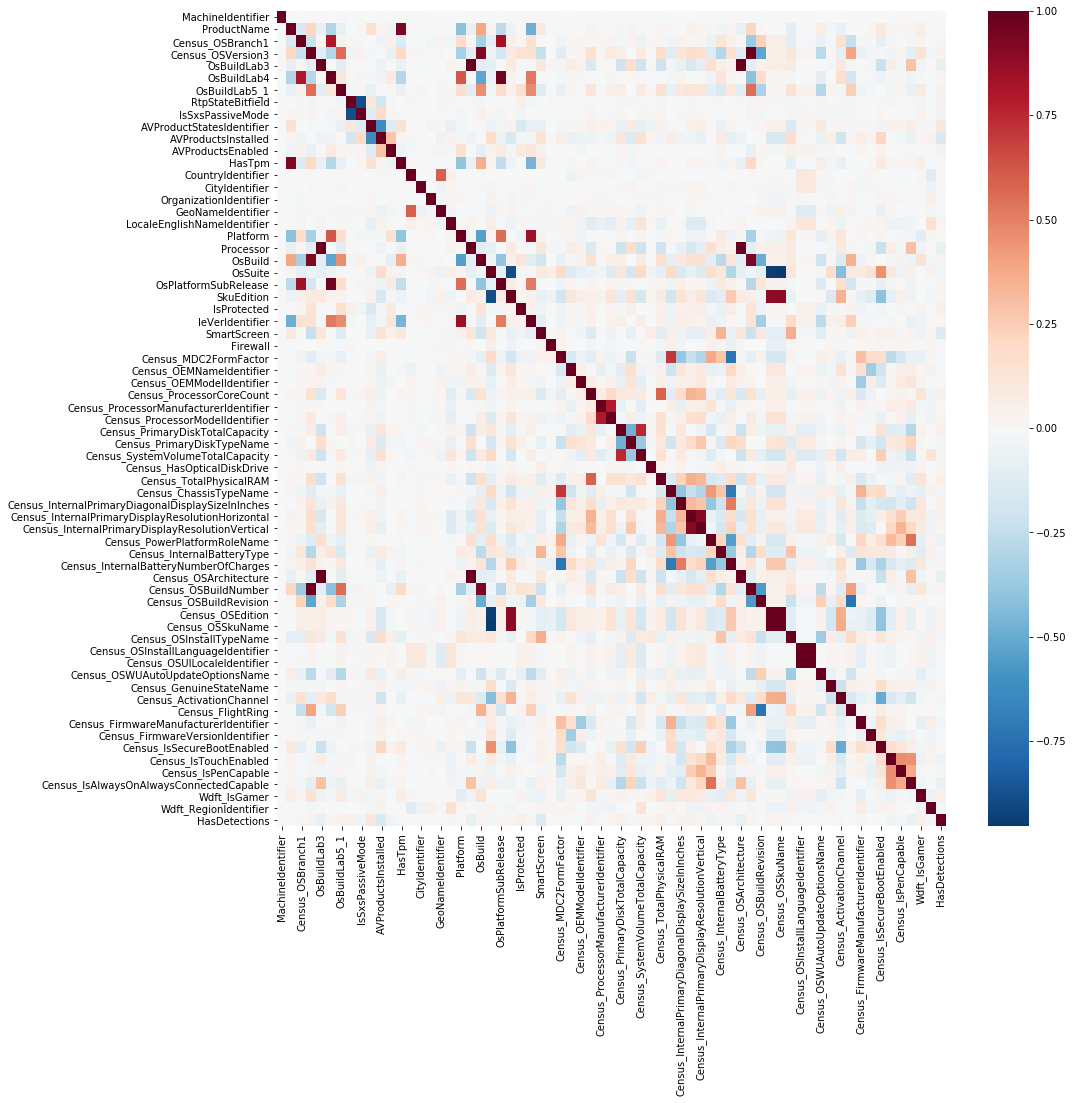

In [ ]:
plt.figure(figsize=(15,15))
sns.heatmap(traindata.corr(),cmap='RdBu_r',annot=True,fmt='d',center=0)
plt.title('Correlation between all columns')
plt.show()

In [ ]:
def correlation(dataset, threshold):
    col_corr = set() # Set of all the names of deleted columns
    corr_matrix = dataset.corr()
    tuple_list=[]
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if (corr_matrix.iloc[i, j] >= threshold):
                colname = corr_matrix.columns[i] # getting the name of column
                col_corr.add(colname)
                col_corr.add(corr_matrix.columns[j])
                print(corr_matrix.columns[i]," ", corr_matrix.columns[j])
                tuple_list.append([corr_matrix.columns[i], corr_matrix.columns[j]])

                #if colname in dataset.columns:
                    #del dataset[colname] # deleting the column from the dataset

    # [print(p) for p in col_corr]
    return list(col_corr), tuple_list


In [ ]:
corr_cols,tuple_list = correlation(traindata,0.8)

OsBuildLab4   Census_OSBranch1
HasTpm   ProductName
Processor   OsBuildLab3
OsBuild   Census_OSVersion3
OsPlatformSubRelease   Census_OSBranch1
OsPlatformSubRelease   OsBuildLab4
IeVerIdentifier   Platform
Census_InternalPrimaryDisplayResolutionVertical   Census_InternalPrimaryDisplayResolutionHorizontal
Census_OSArchitecture   OsBuildLab3
Census_OSArchitecture   Processor
Census_OSBuildNumber   Census_OSVersion3
Census_OSBuildNumber   OsBuild
Census_OSEdition   SkuEdition
Census_OSSkuName   SkuEdition
Census_OSSkuName   Census_OSEdition
Census_OSUILocaleIdentifier   Census_OSInstallLanguageIdentifier


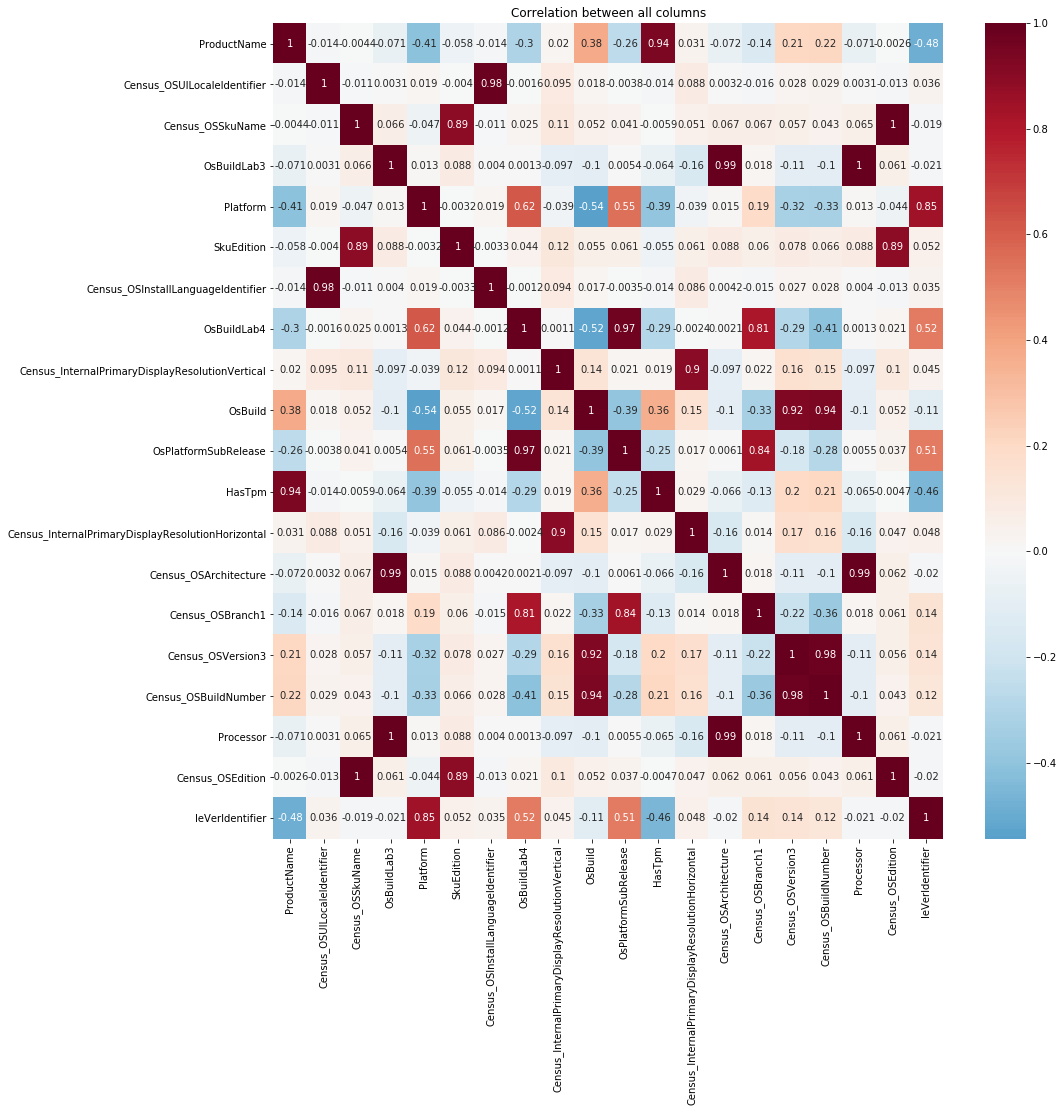

In [ ]:
plt.figure(figsize=(15,15))
# correl_cols_set=set(correl_cols)
# correl_cols = 
sns.heatmap(traindata[corr_cols].corr(),cmap='RdBu_r',annot=True,center=0)
plt.title('Correlation between all columns')
plt.show()

In [ ]:
cols_to_remove=[]
for tupl in tuple_list:
  tempa=tupl[0]
  tempb=tupl[1]
  if traindata['HasDetections'].corr(traindata[tempa])>traindata['HasDetections'].corr(traindata[tempb]):
    cols_to_remove.append(tempb)
  else:
    cols_to_remove.append(tempa)
cols_to_remove=set(cols_to_remove)
i=0
for col in cols_to_remove:
  i=i+1
  print(col)
print(i)
# print(cols_to_remove)


ProductName
Census_OSUILocaleIdentifier
OsBuildLab3
Platform
SkuEdition
OsBuildLab4
Census_InternalPrimaryDisplayResolutionVertical
OsBuild
Census_OSBranch1
Census_OSBuildNumber
Processor
Census_OSSkuName
12


In [ ]:
for col in cols_to_remove:
  traindata.drop(col, axis=1, inplace=True)


In [ ]:
traindata.drop('MachineIdentifier', axis=1, inplace=True)

In [ ]:
traindata.head()

,Census_OSVersion3,Census_OSVersion4,OsBuildLab1,OsBuildLab2,OsBuildLab5_1,OsBuildLab5_2,OsVer1,OsVer2,OsVer3,SigVersion2,SigVersion3,AppVersion2,AppVersion3,AppVersion4,EngineVersion2,EngineVersion3,EngineVersion4,RtpStateBitfield,IsSxsPassiveMode,AVProductStatesIdentifier,AVProductsInstalled,AVProductsEnabled,HasTpm,CountryIdentifier,CityIdentifier,OrganizationIdentifier,GeoNameIdentifier,LocaleEnglishNameIdentifier,OsSuite,OsPlatformSubRelease,IsProtected,IeVerIdentifier,SmartScreen,Firewall,Census_MDC2FormFactor,Census_OEMNameIdentifier,Census_OEMModelIdentifier,Census_ProcessorCoreCount,Census_ProcessorManufacturerIdentifier,Census_ProcessorModelIdentifier,Census_PrimaryDiskTotalCapacity,Census_PrimaryDiskTypeName,Census_SystemVolumeTotalCapacity,Census_HasOpticalDiskDrive,Census_TotalPhysicalRAM,Census_ChassisTypeName,Census_InternalPrimaryDiagonalDisplaySizeInInches,Census_InternalPrimaryDisplayResolutionHorizontal,Census_PowerPlatformRoleName,Census_InternalBatteryType,Census_InternalBatteryNumberOfCharges,Census_OSArchitecture,Census_OSBuildRevision,Census_OSEdition,Census_OSInstallTypeName,Census_OSInstallLanguageIdentifier,Census_OSWUAutoUpdateOptionsName,Census_GenuineStateName,Census_ActivationChannel,Census_FlightRing,Census_FirmwareManufacturerIdentifier,Census_FirmwareVersionIdentifier,Census_IsSecureBootEnabled,Census_IsTouchEnabled,Census_IsPenCapable,Census_IsAlwaysOnAlwaysConnectedCapable,Wdft_IsGamer,Wdft_RegionIdentifier,HasDetections
0,36,165,17134,1,167,1804,10,0,0,273,1735,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,29,128035.0,18.0,35.0,171,256,4,1.0,137.0,4,1.0,2,2668.0,9124.0,4.0,5.0,2341.0,476940.0,0,299451.0,0,4096.0,12,18.9,1440.0,1,4,4.294967e+09,0,165,12,6,26.0,5,1,2,3,628.0,36144.0,0,0,0,0.0,0.0,10.0,0
1,36,1,17134,1,167,1804,10,0,0,263,48,13,17134,1,13,17134,1,7.0,0,53447.0,1.0,1.0,1,93,1482.0,18.0,119.0,64,256,4,1.0,137.0,4,1.0,7,2668.0,91656.0,4.0,5.0,2405.0,476940.0,0,102385.0,0,4096.0,24,13.9,1366.0,3,4,1.000000e+00,0,1,12,2,8.0,5,2,2,1,628.0,57858.0,0,0,0,0.0,0.0,8.0,0
2,36,165,17134,1,167,1804,10,0,0,273,1341,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,86,153579.0,18.0,64.0,49,768,4,1.0,137.0,10,1.0,2,4909.0,317701.0,4.0,5.0,1972.0,114473.0,1,113907.0,0,4096.0,12,21.5,1920.0,1,4,4.294967e+09,0,165,2,6,7.0,2,1,1,3,142.0,52682.0,0,0,0,0.0,0.0,3.0,0
3,36,228,17134,1,167,1804,10,0,0,273,1527,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,88,20710.0,0.0,117.0,115,256,4,1.0,137.0,3,1.0,2,1443.0,275890.0,4.0,5.0,2273.0,238475.0,2,227116.0,0,4096.0,22,18.5,1366.0,1,4,4.294967e+09,0,228,12,6,17.0,2,1,1,3,355.0,20050.0,0,0,0,0.0,0.0,3.0,1
4,36,191,17134,1,167,1804,10,0,0,273,1379,18,1807,18075,18,1807,18075,7.0,0,53447.0,1.0,1.0,1,18,37376.0,0.0,277.0,75,768,4,1.0,137.0,10,1.0,7,1443.0,331929.0,4.0,5.0,2500.0,476940.0,0,101900.0,0,6144.0,27,14.0,1366.0,3,23,0.000000e+00,0,191,2,7,8.0,2,1,2,3,355.0,19844.0,0,0,0,0.0,0.0,1.0,1


# Running different algorithms on the refined data